In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle

In [96]:
sid = ['/media/siddharth/New Volume1/Github/My Analysis - SF/USA_AK_Anchorage.Intl.AP.702730_TMY3_BASE.csv','/media/siddharth/New Volume1/Github/My Analysis - SF/Anchorage_Weather.csv']
path = sid[0]
path_weather = sid[1]

In [97]:
df=pd.read_csv(path)
#print df.head(3),"\n"
df_weather = pd.read_csv(path_weather,header=1)

In [98]:
df_set= df['Electricity:Facility [kW](Hourly)']
values = pd.DataFrame(df_set.values)


dataframe = pd.concat([values.shift(2),values.shift(1), values], axis=1)
#above line is same as dataframe = np.hstack( (np.hstack(( values[2:], values[1:-2])) , values[:-3] ) )

dataframe.columns = ['t-2', 't-1','t']

# To remove the NaN values
dataframe= pd.DataFrame(dataframe[2:])

scaler = StandardScaler()
scaler.fit(dataframe.values)

#print dataframe

x = dataframe.loc[:,'t-2':'t-1']
y = pd.DataFrame(dataframe.loc[:,'t'])

print x.head(4)
y.columns = ['t']
print y.head(4)

        t-2       t-1
2  1.019364  0.887116
3  0.887116  0.833463
4  0.833463  0.818020
5  0.818020  0.812916
          t
2  0.833463
3  0.818020
4  0.812916
5  0.865135


In [99]:
X_train,X_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.2,random_state=1)

In [100]:
#scaler.transform(X_train)
#scaler.transform(X_test)
len(y_train)
len(y_test)
X_train = np.concatenate([X_train,X_test],axis=0)
y_train = np.concatenate([y_train,y_test],axis=0)

In [101]:
X_train[0]

array([ 1.24551648,  0.9399456 ])

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 1.2282 - mean_squared_error: 1.2282 - val_loss: 1.1748 - val_mean_squared_error: 1.1748
Epoch 2/10
0s - loss: 1.0931 - mean_squared_error: 1.0931 - val_loss: 1.0168 - val_mean_squared_error: 1.0168
Epoch 3/10
0s - loss: 0.9233 - mean_squared_error: 0.9233 - val_loss: 0.8383 - val_mean_squared_error: 0.8383
Epoch 4/10
0s - loss: 0.7497 - mean_squared_error: 0.7497 - val_loss: 0.6752 - val_mean_squared_error: 0.6752
Epoch 5/10
0s - loss: 0.6035 - mean_squared_error: 0.6035 - val_loss: 0.5484 - val_mean_squared_error: 0.5484
Epoch 6/10
0s - loss: 0.4942 - mean_squared_error: 0.4942 - val_loss: 0.4568 - val_mean_squared_error: 0.4568
Epoch 7/10
0s - loss: 0.4153 - mean_squared_error: 0.4153 - val_loss: 0.3915 - val_mean_squared_error: 0.3915
Epoch 8/10
0s - loss: 0.3602 - mean_squared_error: 0.3602 - val_loss: 0.3462 - val_mean_squared_error: 0.3462
Epoch 9/10
0s - loss: 0.3208 - mean_squared_error: 0.3208 - val_loss: 0.

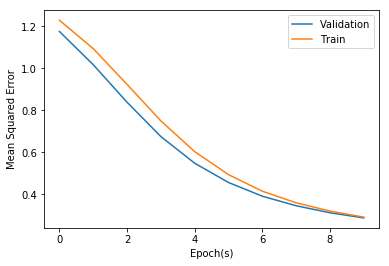

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 0.4518 - mean_squared_error: 0.4518 - val_loss: 0.4508 - val_mean_squared_error: 0.4508
Epoch 2/10
0s - loss: 0.4305 - mean_squared_error: 0.4305 - val_loss: 0.4291 - val_mean_squared_error: 0.4291
Epoch 3/10
0s - loss: 0.4084 - mean_squared_error: 0.4084 - val_loss: 0.4070 - val_mean_squared_error: 0.4070
Epoch 4/10
0s - loss: 0.3868 - mean_squared_error: 0.3868 - val_loss: 0.3855 - val_mean_squared_error: 0.3855
Epoch 5/10
0s - loss: 0.3657 - mean_squared_error: 0.3657 - val_loss: 0.3649 - val_mean_squared_error: 0.3649
Epoch 6/10
0s - loss: 0.3456 - mean_squared_error: 0.3456 - val_loss: 0.3454 - val_mean_squared_error: 0.3454
Epoch 7/10
0s - loss: 0.3269 - mean_squared_error: 0.3269 - val_loss: 0.3274 - val_mean_squared_error: 0.3274
Epoch 8/10
0s - loss: 0.3100 - mean_squared_error: 0.3100 - val_loss: 0.3114 - val_mean_squared_error: 0.3114
Epoch 9/10
0s - loss: 0.2949 - mean_squared_error: 0.2949 - val_loss: 0.

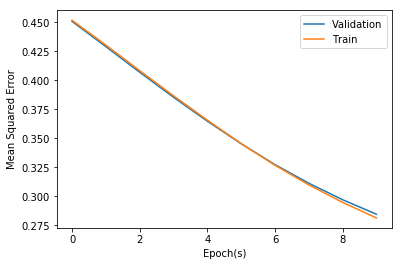

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 0.4737 - mean_squared_error: 0.4737 - val_loss: 0.4755 - val_mean_squared_error: 0.4755
Epoch 2/10
0s - loss: 0.4577 - mean_squared_error: 0.4577 - val_loss: 0.4595 - val_mean_squared_error: 0.4595
Epoch 3/10
0s - loss: 0.4415 - mean_squared_error: 0.4415 - val_loss: 0.4428 - val_mean_squared_error: 0.4428
Epoch 4/10
0s - loss: 0.4245 - mean_squared_error: 0.4245 - val_loss: 0.4252 - val_mean_squared_error: 0.4252
Epoch 5/10
0s - loss: 0.4065 - mean_squared_error: 0.4065 - val_loss: 0.4068 - val_mean_squared_error: 0.4068
Epoch 6/10
0s - loss: 0.3879 - mean_squared_error: 0.3879 - val_loss: 0.3877 - val_mean_squared_error: 0.3877
Epoch 7/10
0s - loss: 0.3684 - mean_squared_error: 0.3684 - val_loss: 0.3679 - val_mean_squared_error: 0.3679
Epoch 8/10
0s - loss: 0.3488 - mean_squared_error: 0.3488 - val_loss: 0.3483 - val_mean_squared_error: 0.3483
Epoch 9/10
0s - loss: 0.3294 - mean_squared_error: 0.3294 - val_loss: 0.

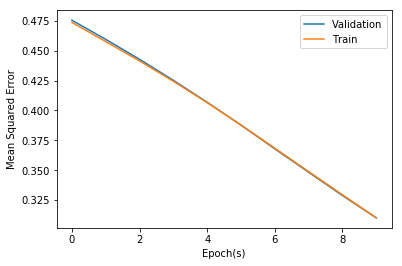

Train on 7006 samples, validate on 1752 samples
Epoch 1/10
0s - loss: 1.2242 - mean_squared_error: 1.2242 - val_loss: 1.1716 - val_mean_squared_error: 1.1716
Epoch 2/10
0s - loss: 1.0900 - mean_squared_error: 1.0900 - val_loss: 1.0098 - val_mean_squared_error: 1.0098
Epoch 3/10
0s - loss: 0.9020 - mean_squared_error: 0.9020 - val_loss: 0.7946 - val_mean_squared_error: 0.7946
Epoch 4/10
0s - loss: 0.6760 - mean_squared_error: 0.6760 - val_loss: 0.5601 - val_mean_squared_error: 0.5601
Epoch 5/10
0s - loss: 0.4532 - mean_squared_error: 0.4532 - val_loss: 0.3526 - val_mean_squared_error: 0.3526
Epoch 6/10
0s - loss: 0.2706 - mean_squared_error: 0.2706 - val_loss: 0.2013 - val_mean_squared_error: 0.2013
Epoch 7/10
0s - loss: 0.1525 - mean_squared_error: 0.1525 - val_loss: 0.1161 - val_mean_squared_error: 0.1161
Epoch 8/10
0s - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.0800 - val_mean_squared_error: 0.0800
Epoch 9/10
0s - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.

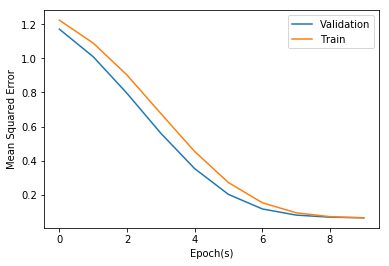

In [102]:

#To input to the model, the pixels need to be converted to a 28 x 28
#i.e. 784 length vector.
'''Flatten 28 x 28 images to a 784 vector for each image.'''
#num_pixels = X_train.shape[1]*X_train.shape[2]
num_pixels=2

#X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
#X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

#Scaling (range [0,1] )
#X_train = X_train*1.0/255
#X_test = X_test*1.0/255

#One-hot encode the outputs.
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]
num_classes=1

#define baseline model.
def baseline_model():
    #Create model.
    model = Sequential()
    #Hidden Layer.
    '''It means that the input_dim is the size of the input, and the 
       the num_pixels is the number of neurons in the first hidden layer.  
    '''
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation=i))
    #Output Layer.
    model.add(Dense(num_classes,kernel_initializer='normal',activation=i))
    #Compile model.
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
    return model

activations = ['tanh','sigmoid','hard_sigmoid','linear']
for i in activations:
    #Build the model.
    model = baseline_model()
    #Fit the model.
    history = model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
    print ("Model : ",i)
    print history.history['val_loss']
    
    p1, = plt.plot(history.history['val_loss'])
    p2, = plt.plot(history.history['loss'])
    plt.xlabel("Epoch(s)")
    plt.ylabel("Mean Squared Error")
    plt.legend([p1,p2],['Validation','Train'])
    plt.show()
    #model.summary()

    #Final Evaluation of the model.
    #scores = model.evaluate(X_test,y_test,verbose=0)
    #print ("Model : ",i)
    #print ("Score : %.5f" % (100-scores[1]*100)),"\n\n"

In [103]:
X_train[:3]

array([[ 1.24551648,  0.9399456 ],
       [ 0.79024752,  1.00582298],
       [ 0.89470353,  1.10083911]])

In [104]:
df.dtypes

Date/Time                                           object
Electricity:Facility [kW](Hourly)                  float64
Gas:Facility [kW](Hourly)                          float64
Heating:Electricity [kW](Hourly)                     int64
Heating:Gas [kW](Hourly)                           float64
Cooling:Electricity [kW](Hourly)                     int64
HVACFan:Fans:Electricity [kW](Hourly)              float64
Electricity:HVAC [kW](Hourly)                      float64
Fans:Electricity [kW](Hourly)                      float64
General:InteriorLights:Electricity [kW](Hourly)    float64
General:ExteriorLights:Electricity [kW](Hourly)    float64
Appl:InteriorEquipment:Electricity [kW](Hourly)    float64
Misc:InteriorEquipment:Electricity [kW](Hourly)    float64
Water Heater:WaterSystems:Gas [kW](Hourly)         float64
dtype: object

In [105]:
#London Dataset.
#60-min. and 1-min.
d60 = pd.read_csv("/media/siddharth/New Volume1/Github/TherML Data/Open Power System Data/opsd-household_data-2017-09-01/household_data_60min_singleindex.csv",header=0)
d1 = pd.read_csv("/media/siddharth/New Volume1/Github/TherML Data/Open Power System Data/opsd-household_data-2017-09-01/household_data_1min_singleindex.csv",header=0)

In [106]:
d60.tail(4)

,utc_timestamp,cet_cest_timestamp,DE_KN_residential4_dishwasher,DE_KN_residential4_ev,DE_KN_residential4_freezer,DE_KN_residential4_grid_export,DE_KN_residential4_grid_import,DE_KN_residential4_heat_pump,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,interpolated_values
11863,2017-02-09T08:00:00Z,2017-02-09T09:00:00+0100,NaN,1346.285,210.241,9561.294,6320.450,4327.14,12333.530,NaN,148.689,NaN
11864,2017-02-09T09:00:00Z,2017-02-09T10:00:00+0100,NaN,1346.285,210.255,9561.824,6320.940,4328.01,12334.595,NaN,148.689,NaN
11865,2017-02-09T10:00:00Z,2017-02-09T11:00:00+0100,NaN,1346.285,210.270,9562.580,6321.230,4328.80,12336.005,NaN,148.689,NaN
11866,2017-02-09T11:00:00Z,2017-02-09T12:00:00+0100,NaN,1346.285,210.270,9563.098,6321.393,4329.31,12336.971,NaN,148.689,NaN


In [107]:
d60.columns.shape
d60.columns

Index([u'utc_timestamp', u'cet_cest_timestamp',
       u'DE_KN_residential4_dishwasher', u'DE_KN_residential4_ev',
       u'DE_KN_residential4_freezer', u'DE_KN_residential4_grid_export',
       u'DE_KN_residential4_grid_import', u'DE_KN_residential4_heat_pump',
       u'DE_KN_residential4_pv', u'DE_KN_residential4_refrigerator',
       u'DE_KN_residential4_washing_machine', u'interpolated_values'],
      dtype='object')

In [158]:
#Finding NAs.
for i in range(2,d60.columns.shape[0]-1):
    print d60.columns[i]," : ", (np.sum(np.isnan(d60[d60.columns[i]]))*100)/d60.shape[0]

DE_KN_residential4_dishwasher  :  9
DE_KN_residential4_ev  :  3
DE_KN_residential4_freezer  :  6
DE_KN_residential4_grid_export  :  2
DE_KN_residential4_grid_import  :  2
DE_KN_residential4_heat_pump  :  2
DE_KN_residential4_pv  :  2
DE_KN_residential4_refrigerator  :  10
DE_KN_residential4_washing_machine  :  3


In [109]:
#Finding NAs.
sum=0
for i in range(2,d1.columns.shape[0]-1):
    print d1.columns[i]," : ",np.sum(np.isnan(d1[d1.columns[i]]))
    sum += np.sum(np.isnan(d1[d1.columns[i]]))
sum    

DE_KN_residential4_dishwasher  :  42838
DE_KN_residential4_ev  :  2883
DE_KN_residential4_freezer  :  26354
DE_KN_residential4_grid_export  :  1209
DE_KN_residential4_grid_import  :  1209
DE_KN_residential4_heat_pump  :  1015
DE_KN_residential4_pv  :  1018
DE_KN_residential4_refrigerator  :  52087
DE_KN_residential4_washing_machine  :  1014


129627

In [ ]:
#Return only those rows that contain missing data.
d1[d1.isnull().any(axis=1)].shape[0]

#Remove the time-stamps and the interpolated attribute(s).
d1copy = d1[d.columns[2:10]]

In [ ]:
print d1[d1.isnull().any(axis=1)].shape[0],"\n"
print d1copy[d1copy.isnull().any(axis=1)].shape[0]

In [ ]:
#Return the number of null values across the attributes for the current minute.
np.sum(np.sum(d1copy.head(1).isnull()))

In [152]:
#For which hour, the corresponding minutes have least NULL values across
#all the minutes.

i=0
best_min = 0
best_overall_min=5000

while i <= 60: #update 'i' by +60.
    #Reset the min each hour.
    j=i
    while (j <= d1.shape[0]-1):
        #Return the number of null values across the attributes for the current minute.
        if( np.sum(np.sum(pd.DataFrame(d1copy.values[j]).isnull())) != 0.0):
            best_min += 1
        j+=60    
    if(best_min < best_overall_min):
        best_overall_min = best_min
    #print "No. of Non Null minutes : ",best_min,"\n"
    best_min = 0
    
    i+=1

print best_overall_min    

1290


In [161]:
type(d1.values[0][0])

str

In [ ]:
d1_time = []
#For first 4-hours.
for i in range(d1.shape[0]):
    temp = ( d1.values[i][0][d1.values[i][0].find("T")+1 : 19] )
    d1_time.append(int( temp.split(":")[0] + temp.split(":")[1] ))

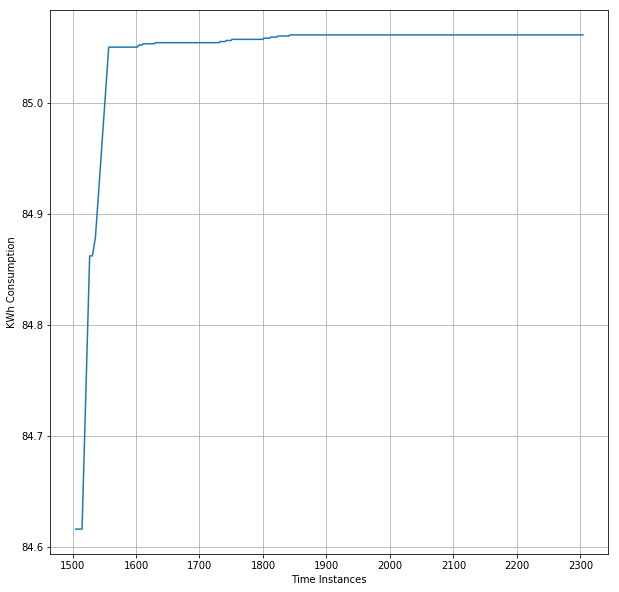

In [275]:
plt.figure(figsize=(10,10))
x = d1_time
y = d1.values[:480,2]
plt.plot(x,y)
plt.grid(True)
plt.ylabel("KWh Consumption")
plt.xlabel("Time Instances")
#plt.xticks(np.arange(min(x),max(x),20))
#plt.yticks(np.arange(min(y),max(y),0.05))
plt.show()

In [ ]:
1290/d1.shape[0]